In [1]:
import pandas as pd

In [2]:
data_df = pd.read_excel('EURO_rate.xlsx')

In [3]:
data_df.head(15)

,nominal,data,curs,cdx
0,1,2015-01-01,68.3681,Евро
1,1,2015-01-13,74.3551,Евро
2,1,2015-01-14,76.7735,Евро
3,1,2015-01-15,77.9629,Евро
4,1,2015-01-16,76.3352,Евро
5,1,2015-01-17,75.8623,Евро
6,1,2015-01-20,75.1740,Евро
7,1,2015-01-21,75.2735,Евро
8,1,2015-01-22,75.8218,Евро
9,1,2015-01-23,75.7724,Евро


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   nominal  1236 non-null   int64         
 1   data     1236 non-null   datetime64[ns]
 2   curs     1236 non-null   float64       
 3   cdx      1236 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 38.8+ KB


In [5]:
data_df.describe()

,nominal,curs
count,1236.0,1236.000000
mean,1.0,70.893355
std,0.0,5.721692
min,1.0,52.908700
25%,1.0,68.674300
50%,1.0,71.221250
75%,1.0,74.326525
max,1.0,91.181400


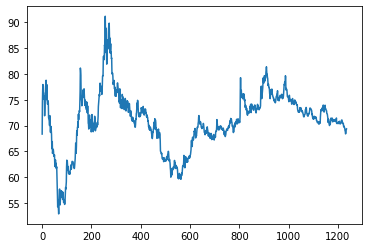

In [6]:
data_df.curs.plot()

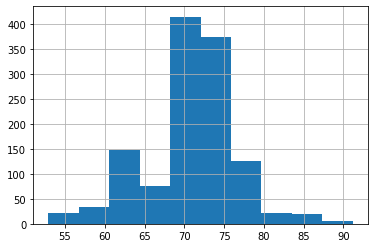

In [7]:
data_df.curs.hist()

In [8]:
past = 4 * 7 # Возьмем 4 недели из прошлого
future = 7 # Возьмем 7 дней из будущего

In [9]:
money = data_df.curs

In [10]:
start = past 
end = len(money) - future 

In [11]:
start # День старта

28

In [12]:
end # День окончания

1229

In [13]:
end - start # Количество примеров для модели

1201

In [14]:
money[72:100] # Пример получения 28 дней из прошлого

72    55.1255
73    54.6590
74    55.8747
75    56.9016
76    56.8060
77    57.1578
78    57.4093
79    56.1843
80    57.2207
81    56.8971
82    57.1102
83    55.7138
84    57.1383
85    56.9881
86    56.1030
87    55.1085
88    55.2441
89    55.5714
90    55.5508
91    54.7477
92    54.8412
93    55.6757
94    57.1433
95    58.0145
96    57.7020
97    58.6037
98    59.1130
99    61.9471
Name: curs, dtype: float64

In [15]:
money[100:107] # Пример, получение 7 значений из будущего

100    63.3221
101    62.5053
102    63.0721
103    62.2064
104    61.4754
105    62.1045
106    61.1040
Name: curs, dtype: float64

In [16]:
new_df = [] # Создадим новый список, где для каждого из ~ 1220 дней будет записано 28 прошлых + 7 будущий = 35 значений курса
for i in range(start, end):
    all_days = money[(i-past):(i+future)]
    new_df.append(list(all_days))

In [17]:
len(new_df[2])

35

In [18]:
past_columns = []
for i in range(past):
    past_columns.append(f'past_{i}')
    
past_columns

['past_0',
 'past_1',
 'past_2',
 'past_3',
 'past_4',
 'past_5',
 'past_6',
 'past_7',
 'past_8',
 'past_9',
 'past_10',
 'past_11',
 'past_12',
 'past_13',
 'past_14',
 'past_15',
 'past_16',
 'past_17',
 'past_18',
 'past_19',
 'past_20',
 'past_21',
 'past_22',
 'past_23',
 'past_24',
 'past_25',
 'past_26',
 'past_27']

In [19]:
future_columns = []
for i in range(future):
    future_columns.append(f'future_{i}')
future_columns

['future_0',
 'future_1',
 'future_2',
 'future_3',
 'future_4',
 'future_5',
 'future_6']

In [20]:
trans_df = pd.DataFrame(new_df, columns=(past_columns+future_columns))

In [21]:
trans_df

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,68.3681,74.3551,76.7735,77.9629,76.3352,75.8623,75.1740,75.2735,75.8218,75.7724,...,74.3675,71.5426,71.3243,71.0800,70.9408,70.0315,71.9422,71.1655,68.9797,68.6857
1,74.3551,76.7735,77.9629,76.3352,75.8623,75.1740,75.2735,75.8218,75.7724,71.9067,...,71.5426,71.3243,71.0800,70.9408,70.0315,71.9422,71.1655,68.9797,68.6857,69.5424
2,76.7735,77.9629,76.3352,75.8623,75.1740,75.2735,75.8218,75.7724,71.9067,73.5633,...,71.3243,71.0800,70.9408,70.0315,71.9422,71.1655,68.9797,68.6857,69.5424,69.8487
3,77.9629,76.3352,75.8623,75.1740,75.2735,75.8218,75.7724,71.9067,73.5633,76.2922,...,71.0800,70.9408,70.0315,71.9422,71.1655,68.9797,68.6857,69.5424,69.8487,69.1138
4,76.3352,75.8623,75.1740,75.2735,75.8218,75.7724,71.9067,73.5633,76.2922,76.2629,...,70.9408,70.0315,71.9422,71.1655,68.9797,68.6857,69.5424,69.8487,69.1138,68.3086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,70.4301,70.5489,70.4211,70.4759,70.4235,70.6724,70.6761,70.4111,70.5313,70.6286,...,70.4558,70.4271,69.8608,69.9431,69.6801,69.6925,69.5877,69.3780,68.9978,68.9062
1197,70.5489,70.4211,70.4759,70.4235,70.6724,70.6761,70.4111,70.5313,70.6286,70.8524,...,70.4271,69.8608,69.9431,69.6801,69.6925,69.5877,69.3780,68.9978,68.9062,68.4065
1198,70.4211,70.4759,70.4235,70.6724,70.6761,70.4111,70.5313,70.6286,70.8524,70.6997,...,69.8608,69.9431,69.6801,69.6925,69.5877,69.3780,68.9978,68.9062,68.4065,68.5003
1199,70.4759,70.4235,70.6724,70.6761,70.4111,70.5313,70.6286,70.8524,70.6997,70.5207,...,69.9431,69.6801,69.6925,69.5877,69.3780,68.9978,68.9062,68.4065,68.5003,69.0349


In [22]:
# Подготовим обучающую выборку.
X = trans_df[past_columns][:-1] # Данные на которых модель будет делать предсказания
Y = trans_df[future_columns][:-1] # Данные котороые модель долдна получить (предсказывать)

In [23]:
# Экзамен, тестовая выборка на которой будем тестировать модель
X_test = trans_df[past_columns][-1:]
Y_test = trans_df[future_columns][-1:]

In [24]:
X_test

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_18,past_19,past_20,past_21,past_22,past_23,past_24,past_25,past_26,past_27
1200,70.4235,70.6724,70.6761,70.4111,70.5313,70.6286,70.8524,70.6997,70.5207,70.3122,...,70.7594,70.5047,70.3881,70.4558,70.4271,69.8608,69.9431,69.6801,69.6925,69.5877


In [25]:
# Задача регрессии - по одним числам предсказать другие.
# Задача классификации - по входным данным определить класс объекта.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
LinReg = LinearRegression()

In [28]:
LinReg.fit(X, Y) # Обучение модели

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
prediction = LinReg.predict(X_test)

In [30]:
prediction

array([[69.59535619, 69.59137185, 69.63098662, 69.61268695, 69.65454353,
        69.53683678, 69.58139255]])

In [31]:
Y_test

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
1200,69.378,68.9978,68.9062,68.4065,68.5003,69.0349,69.3406


In [32]:
import matplotlib.pyplot as plt

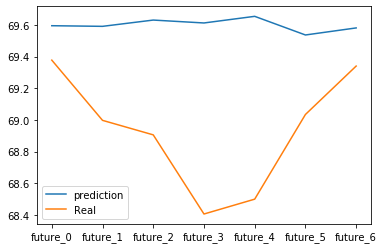

In [33]:
plt.plot(prediction[0], label='prediction')
plt.plot(Y_test.iloc[0], label='Real')
plt.legend()

In [34]:
from sklearn.metrics import mean_absolute_error, max_error

In [35]:
mean_absolute_error(prediction[0], Y_test.iloc[0])

0.6626963513454618

In [36]:
max_error(prediction[0], Y_test.iloc[0])

1.2061869490383685

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
KNN = KNeighborsRegressor()
KNN.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

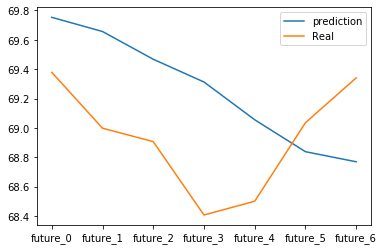

In [39]:
prediction = KNN.predict(X_test)
plt.plot(prediction[0], label='prediction')
plt.plot(Y_test.iloc[0], label='Real')
plt.legend()

In [40]:
mean_absolute_error(prediction[0], Y_test.iloc[0])

0.5462600000000017

In [41]:
max_error(prediction[0], Y_test.iloc[0])

0.9059400000000011

In [42]:
from sklearn.neural_network import MLPRegressor

In [43]:
MLP = MLPRegressor(random_state=42, max_iter=1500, hidden_layer_sizes=(100,100,100))
MLP.fit(X, Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [44]:
prediction = MLP.predict(X_test)

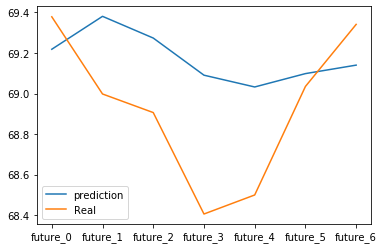

In [45]:
plt.plot(prediction[0], label='prediction')
plt.plot(Y_test.iloc[0], label='Real')
plt.legend()

In [46]:
mean_absolute_error(prediction[0], Y_test.iloc[0])

0.3413167936583343

In [47]:
max_error(prediction[0], Y_test.iloc[0])

0.6838583675852448

In [48]:
from sklearn.linear_model import Lasso

In [49]:
reg = Lasso(alpha=0.1, max_iter=1600 )
reg.fit(X, Y)
# Lasso(alpha=0.1)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1600,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
prediction = reg.predict(X_test)

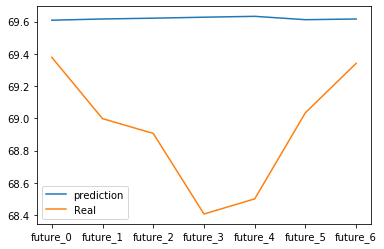

In [51]:
plt.plot(prediction[0], label='prediction')
plt.plot(Y_test.iloc[0], label='Real')
plt.legend()

In [52]:
mean_absolute_error(prediction[0], Y_test.iloc[0])

0.6808469947168773

In [53]:
max_error(prediction[0], Y_test.iloc[0])

1.220228428522418